In [18]:
#package import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle
import difflib 
from wordcloud import WordCloud
import numpy as np 
import math
from pandas_summary import DataFrameSummary 
from scipy import stats
from scipy.stats import skew

In [65]:
from matplotlib.colors import LinearSegmentedColormap

In [19]:
#ignore warnings during the project 
warnings.simplefilter("ignore") 

In [20]:
#importing plotly modules --- it would help in implementing interactive plots 
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go 

In [21]:
#display current directory
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\nourd\Final Project


In [22]:
#set color palette for the plots 
cmap = sns.color_palette("mako", as_cmap=True) 

In [23]:
# Set display options to show all rows
#pd.set_option('display.max_rows', None)

In [24]:
#import the data that contains income 
private_public_income = pd.read_excel("C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\datasets\\fundraising_data.xlsx") 
list_countries_regions = pd.read_excel("C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\datasets\\list_countries_regions.xlsx")

### Functions used

In [25]:
#clean up the textual data in the notes
def calculate_similarity(row):
    concatenated_values = str(row['Type']) + str(row['Item'])
    similarity = difflib.SequenceMatcher(None, concatenated_values, str(row['Notes'])).ratio()
    return similarity

In [26]:
# Define a custom function that applies your condition
def group_creation(category):
    if category == 'Public Funds':
        return 'Public Funds'
    else:
        return 'Private Sector'

private_public_income['Group'] = private_public_income['Category'].apply(group_creation)

In [27]:
#we want to create a new column where we classify organizations into non governmental and intergovernmental
def organization_category(organization): 
    if organization in ['WFP','UNI','UHR']: 
        return 'Intergovernmental Organizations (IGO)' 
    else: 
        return 'Non-Governmental Organizations (NGOs)'  
#apply the function to our dataset

private_public_income['Organization Class'] = private_public_income['OrgCode'].apply(organization_category)


In [28]:
#countplot general function to use for visualization 

def countplot_graphing(dataset,column,hue = None,orient = 'v' ,stat = 'percent',figure_size = (8, 6)) : 
    #set the order in the dataset 
    order = dataset[column].value_counts(normalize = True).index
    # Set the default figure size
    plt.rcParams['figure.figsize'] = figure_size
    #plot the graph in a bar plot 
    sns.countplot(x = column,data = dataset,stat = stat ,order = order,orient = orient,hue = hue) 
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show()


In [29]:
def catplot_graphing(dataset,x,y,estimator = 'mean',hue = None,figure_size = (8, 6),kind = 'bar') : 
    #set the order in the dataset  
    result = dataset.groupby(x)[y].sum().reset_index().sort_values(by = y,ascending = False).head(17)
    # Set the default figure size
    #plot the graph in a bar plot  
    #we want to add to if the plot is a box plot, color outliers
    if (kind == 'box') : 
        # Set the color for the outliers
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],flierprops = flierprops)
    else: 
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1]) 
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show() 
    return g 

In [30]:
def catplot_graphing_log_transform(dataset,x,y,estimator = 'mean',hue = None,figure_size = (8, 6),kind = 'bar',palette = None) : 
    #set the order in the dataset  
    result = dataset.groupby(x)[y].sum().reset_index().sort_values(by = y,ascending = False).head(17)
    # Set the default figure size
    #plot the graph in a bar plot  
    #we want to add to if the plot is a box plot, color outliers
    if (kind == 'box') : 
        # Set the color for the outliers
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],flierprops = flierprops,palette = palette)
    else: 
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],palette = palette) 
    # Apply log transform to the y-axis
    plt.yscale("log")
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show() 
    return g 

In [31]:
# we want to create a function that we will use to plot the mean and the sum estimation of a variable in a single visual 

def barplot_mean_sum(df,x,y,hue = None) : 
    categories = df[x].unique().tolist()
    # Custom estimator function that returns the mean
    def custom_mean(x):
        return np.mean(x)

    # Custom estimator function that returns the sum
    def custom_sum(x):
        return np.sum(x)

    def custom_median(x): 
        return np.median(x)
    
    
    # Create separate catplots for mean and sum
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    #The chart depicting the mean value 
    sns.barplot(x=x, y=y, data=df, estimator=custom_mean,hue = hue,ax=axes[0],legend = False)
    axes[0].set_title('Mean')
    #The chart depicting the sum value
    sns.barplot(x=x, y=y, data=df, estimator=custom_sum,hue = hue ,ax=axes[1]) 
    axes[1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].set_title('Sum') 
    
   # Rotate x-axis labels for all subplots
    for ax in axes:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(categories, rotation=90) 
    # Adjust layout
    #plt.tight_layout()
    #show the plot 
    plt.show()


In [32]:
#set the color palette for binary plot presentations
colors_binary = ['#00568D', '#338EC9'] 

In [66]:
UNHCR_palette = ["#151819","#565656","#cdcdcd","#dad9d9","#20345b","#536280","#006ab4","#0090bc","#3b8cc5","#699cd4","#8bb2dd","#dfe6f6","#fcc00d","#e4cc00",'#ffed00',"#c01718","#e73d59","#ec697f"]
custom_palette = LinearSegmentedColormap.from_list('UNHCR_palette', UNHCR_palette)

# II. Exploratory Data Analysis
We want to do at the first exploratory visualizations to the variables we have

In [33]:
private_public_income.columns

Index(['ETLControlID', 'OrgCode', 'RowIndex', 'CountryStandardised',
       'CountrySubmitted', 'RegionSubmitted', 'LineDescription',
       'IncomeAllocation', 'RestrictedIncome', 'EmergencyIncome', 'Source',
       'Category', 'Type', 'Item', 'CurrencyCode', 'Notes',
       'IncomeSubmitted2010', 'IncomeSubmitted2011', 'IncomeSubmitted2012',
       'IncomeSubmitted2013', 'IncomeSubmitted2014', 'IncomeSubmitted2015',
       'IncomeSubmitted2016', 'IncomeSubmitted2017', 'IncomeSubmitted2018',
       'IncomeSubmitted2019', 'IncomeSubmitted2020', 'IncomeSubmitted2021',
       'IncomeSubmitted2022', 'ProvisionalFigureCY', 'CurrencyName',
       'ExcludeRow', 'IncomeUSD2010', 'IncomeUSD2011', 'IncomeUSD2012',
       'IncomeUSD2013', 'IncomeUSD2014', 'IncomeUSD2015', 'IncomeUSD2016',
       'IncomeUSD2017', 'IncomeUSD2018', 'IncomeUSD2019', 'IncomeUSD2020',
       'IncomeUSD2021', 'IncomeUSD2022', 'IncomeEUR2010', 'IncomeEUR2011',
       'IncomeEUR2012', 'IncomeEUR2013', 'IncomeEUR2014', 'I

In [34]:
'''
EUR --> Europe    
AMR -->   Americas 
APAC -->  Asia Pacific  
AFR  -->   Africa 
MENA -->   MENA 
Global -->  Global 
'''
private_public_income['UNHCR region'].value_counts()

UNHCR region
EUR       12392
AMR        6129
APAC       5984
AFR        3131
MENA       1766
Global      825
Name: count, dtype: int64

In [35]:
private_public_income['Group'].value_counts()

Group
Private Sector    26012
Public Funds       4215
Name: count, dtype: int64

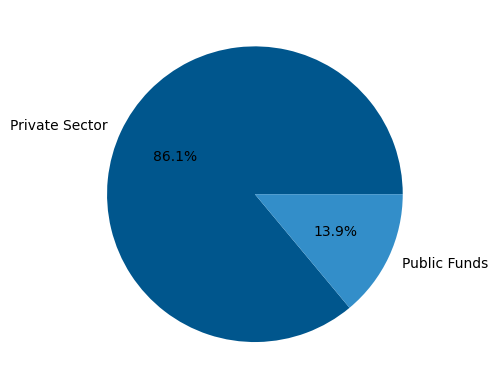

In [36]:
x , y , labels = 'Group','prop',['Private Sector','Public Funds']

(private_public_income[x] 
        .value_counts(normalize = True)
        .rename(y)
        .reset_index()
        .pipe((plt.pie,'data'),y,labels = labels,autopct='%1.1f%%',colors = colors_binary))
#show the plot
plt.show()

In [37]:
private_public_income.describe()

,RowIndex,IncomeSubmitted2010,IncomeSubmitted2011,IncomeSubmitted2012,IncomeSubmitted2013,IncomeSubmitted2014,IncomeSubmitted2015,IncomeSubmitted2016,IncomeSubmitted2017,IncomeSubmitted2018,...,IncomeLCU2015,IncomeLCU2016,IncomeLCU2017,IncomeLCU2018,IncomeLCU2019,IncomeLCU2020,IncomeLCU2021,IncomeLCU2022,UNHCR market,Panel Org
count,30227.000000,2.453000e+03,3.081000e+03,4.132000e+03,5.532000e+03,6.072000e+03,1.163500e+04,1.205200e+04,1.445000e+04,1.761300e+04,...,1.163500e+04,1.205200e+04,1.445000e+04,1.761300e+04,1.759400e+04,1.861100e+04,2.089200e+04,1.902500e+04,15240.0,30227.000000
mean,3738.885434,8.010962e+07,8.084020e+07,7.314087e+07,1.269527e+08,1.430179e+08,8.324587e+07,9.416052e+07,1.090117e+08,9.887438e+07,...,1.445982e+08,1.306661e+08,1.932734e+08,1.783438e+08,1.716400e+08,3.079386e+08,3.458253e+08,6.000733e+08,1.0,0.228438
std,4162.532830,1.183464e+09,1.288208e+09,1.300407e+09,2.315134e+09,2.549807e+09,1.943998e+09,2.000328e+09,2.293652e+09,2.181354e+09,...,2.978996e+09,2.261813e+09,4.455774e+09,4.583453e+09,2.862111e+09,1.210382e+10,1.949361e+10,2.619756e+10,0.0,0.419833
min,1.000000,-7.930000e+06,-6.990000e+06,-3.240349e+07,-4.453260e+07,-1.237648e+09,-1.092863e+08,-1.065183e+09,-2.470584e+09,-9.177280e+08,...,-1.656537e+08,-1.065183e+09,-3.430900e+09,-9.177280e+08,-1.063218e+09,-2.791978e+08,-1.089112e+09,-4.134200e+09,1.0,0.000000
25%,537.000000,3.100000e+04,1.347700e+04,2.567500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.856000e+01,1.0,0.000000
50%,1740.000000,4.100000e+05,3.219030e+05,1.736880e+05,1.263820e+05,9.036700e+04,1.000000e+02,4.800000e+02,7.500000e+02,8.000000e+01,...,2.079500e+02,1.141050e+03,1.901725e+03,1.348300e+02,3.389600e+02,2.540300e+03,1.587720e+03,8.000000e+03,1.0,0.000000
75%,6496.500000,3.871000e+06,3.429757e+06,2.545852e+06,2.784170e+06,2.461438e+06,3.719540e+05,4.129445e+05,5.232958e+05,2.265920e+05,...,6.332865e+05,6.943748e+05,8.642210e+05,3.927700e+05,4.548554e+05,6.353575e+05,4.874714e+05,9.320000e+05,1.0,0.000000
max,14053.000000,4.145620e+10,5.315352e+10,6.642992e+10,1.218509e+11,1.317454e+11,1.357192e+11,1.363137e+11,1.433795e+11,1.651228e+11,...,1.677062e+11,1.363137e+11,3.949447e+11,5.154796e+11,1.884399e+11,1.288386e+12,2.355675e+12,2.631755e+12,1.0,1.000000


In [38]:
private_public_income['Source'].value_counts()

Source
Cash       29039
In-Kind     1188
Name: count, dtype: int64

In [39]:
#what are the consitutants of the Global 
private_public_income[private_public_income['CountryStandardised'] == 'Global']

,ETLControlID,OrgCode,RowIndex,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,...,IncomeLCU2019,IncomeLCU2020,IncomeLCU2021,IncomeLCU2022,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Group,Organization Class
24490,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,9635,Global,Global,NaN,NaN,Country - raising income,Unspecified,No,...,NaN,NaN,26421.11,19995.74,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
24491,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,9636,Global,Global,NaN,NaN,Country - raising income,Unspecified,No,...,NaN,NaN,42139.68,0.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
24492,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,9637,Global,Global,NaN,NaN,Country - raising income,Unspecified,No,...,NaN,NaN,79960.00,474616.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
24493,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,9638,Global,Global,NaN,NaN,Country - raising income,Unspecified,Yes,...,NaN,NaN,352908.00,1509425.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27121,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12266,Global,Global,NaN,NaN,Country - raising income,Unspecified,Yes,...,NaN,NaN,0.00,101406.82,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27122,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12267,Global,Global,NaN,NaN,Country - raising income,Unspecified,Yes,...,NaN,NaN,0.00,61371.84,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27123,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12268,Global,Global,NaN,HNWI,Country - raising income,Unspecified,Yes,...,NaN,NaN,0.00,2000000.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27124,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12269,Global,Global,NaN,NaN,Country - raising income,Unspecified,Yes,...,NaN,NaN,0.00,90000.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27125,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12270,Global,Global,NaN,NaN,Country - raising income,Unspecified,Yes,...,NaN,NaN,0.00,445929.71,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)
27126,652C9D31-DEDC-4A5E-B96F-92529246679D,WFP,12271,Global,Global,NaN,NaN,Country - raising income,Unspecified,No,...,NaN,NaN,0.00,2750919.00,NaN,NaN,0,Global,Private Sector,Intergovernmental Organizations (IGO)


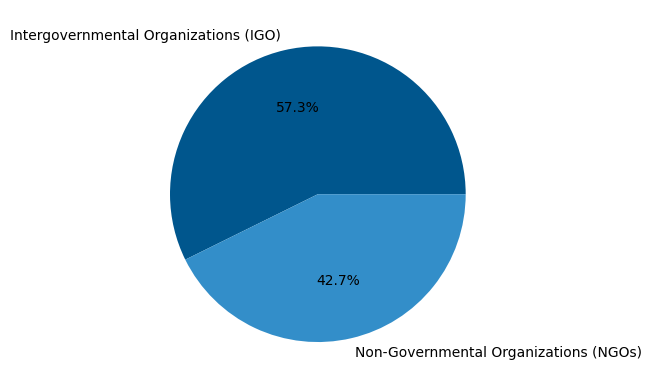

In [40]:
#construct a pie chart to display the percentage of organization class in the dataset
x , y , labels = 'Organization Class','prop',['Intergovernmental Organizations (IGO)','Non-Governmental Organizations (NGOs)']

(private_public_income[x] 
        .value_counts(normalize = True)
        .rename(y)
        .reset_index()
        .pipe((plt.pie,'data'),y,labels = labels,autopct='%1.1f%%',colors = colors_binary))
#show the plot
plt.show()

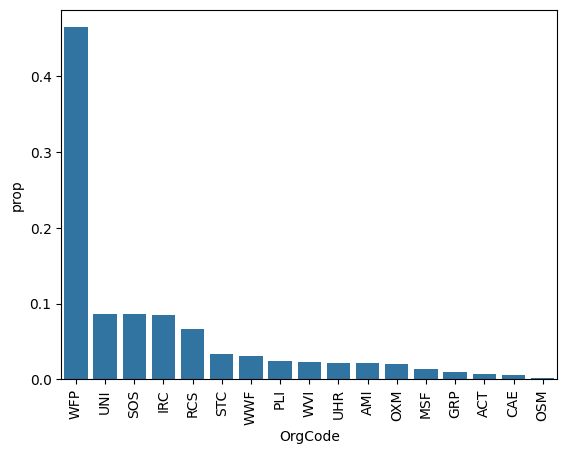

In [41]:
x, y = "OrgCode", "prop"

prop_df = (private_public_income[x]
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, data=prop_df) 

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90) 

plt.show()

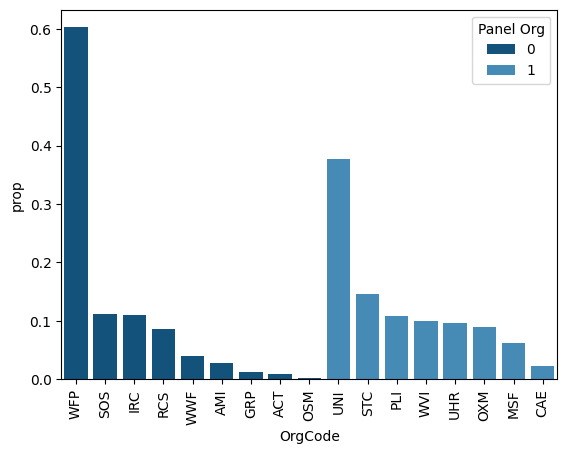

In [42]:
#display the previous chart according to whether or not it is a panel organization  

x, y, hue = "OrgCode", "prop","Panel Org"

prop_df = (private_public_income[x]
           .groupby(private_public_income[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, data=prop_df,hue = hue, palette = colors_binary ) 

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90) 

plt.show()

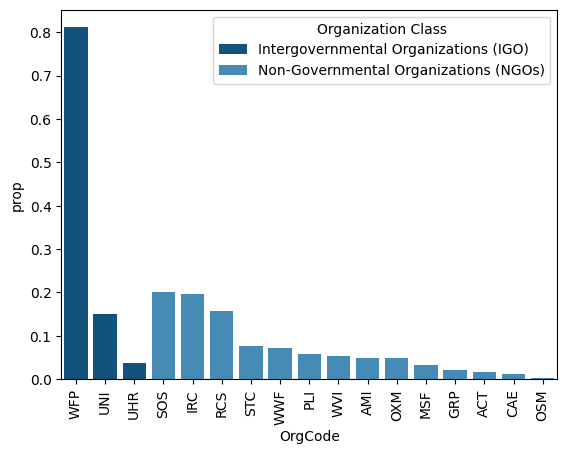

In [43]:
#display the previous chart according to the class of the organization 
x, y, hue = "OrgCode", "prop","Organization Class"

prop_df = (private_public_income[x]
           .groupby(private_public_income[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, data=prop_df,hue = hue, palette = colors_binary) 

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90) 

plt.show()

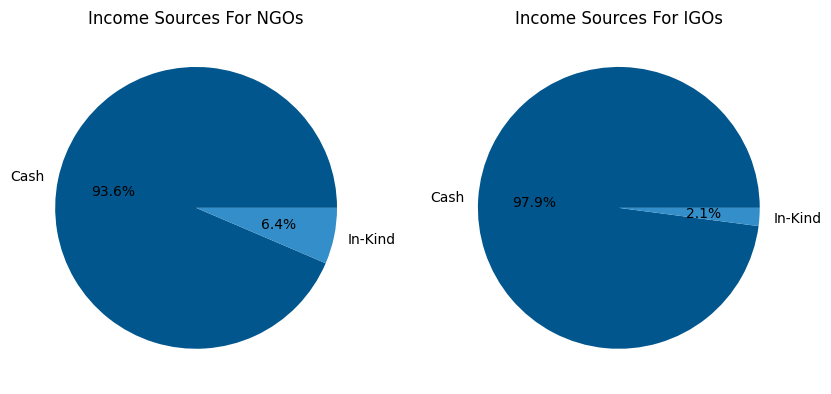

In [44]:
# I want to see whether there is a difference in income sources for NGOs and IGOs 
#seperate the two categories into two datasets

condition_1 = private_public_income['Organization Class'] == 'Non-Governmental Organizations (NGOs)' 
condition_2 = private_public_income['Organization Class'] == 'Intergovernmental Organizations (IGO)' 


private_public_income_NGOs = private_public_income[condition_1]
private_public_income_IGOs = private_public_income[condition_2] 

#let us visualize the income source in each type of organization  
x , y , labels = 'Source','prop',['Cash','In-Kind'] 
plt.figure(figsize=(10, 5))
  
#create subplot 1  
plt.subplot(1, 2, 1)
(private_public_income_NGOs[x] 
        .value_counts(normalize = True)
        .rename(y)
        .reset_index()
        .pipe((plt.pie,'data'),y,labels = labels,autopct='%1.1f%%',colors = colors_binary)) 
plt.title('Income Sources For NGOs')
#create plot 2 
plt.subplot(1, 2, 2)

(private_public_income_IGOs[x] 
        .value_counts(normalize = True)
        .rename(y)
        .reset_index()
        .pipe((plt.pie,'data'),y,labels = labels,autopct='%1.1f%%',colors = colors_binary))  
plt.title('Income Sources For IGOs')

#show the two plots 
plt.show()

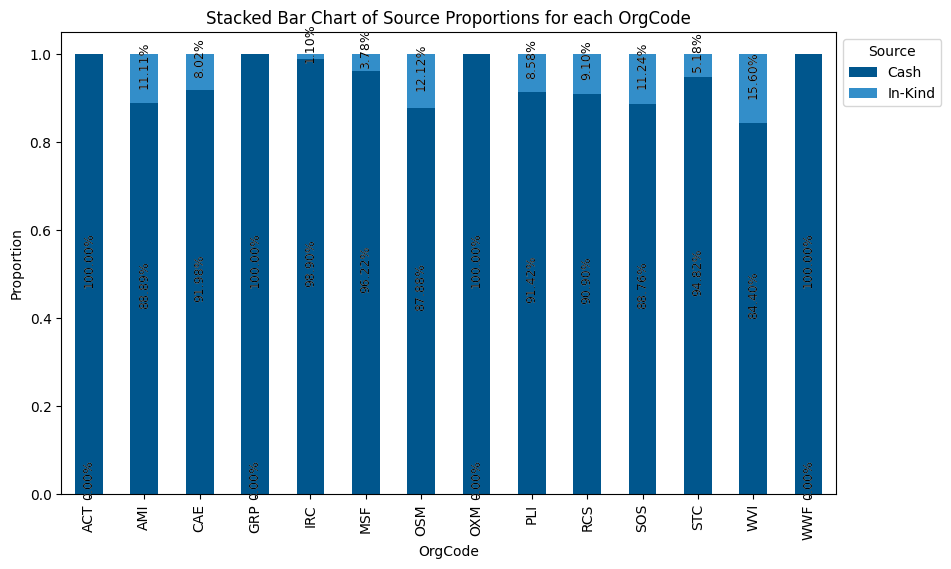

In [45]:
data= private_public_income_NGOs.groupby(['OrgCode', 'Source']).size().unstack().fillna(0)
# Normalize the values by row (proportions)
data_normalized = data.div(data.sum(axis=1), axis=0) 
#specify the specific colors for for each type 
#colors = ['skyblue', 'salmon']
colors = ['#00568D', '#338EC9'] 

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
data_normalized.plot(kind='bar', stacked=True,color = colors,ax = ax) 

# Annotate each bar with the corresponding values 
for p in ax.patches: 
    for source in data.columns: 
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        #Use different text colors based on 'Category'
        text_color = 'white' if source == 'Cash' else 'black'
        ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center',
                rotation='vertical',xytext=(0, 10) ,textcoords='offset points',fontsize = 9,color = text_color) 
# Add labels and title
plt.xlabel('OrgCode')
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart of Source Proportions for each OrgCode')
plt.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
# Show the plot
plt.show()

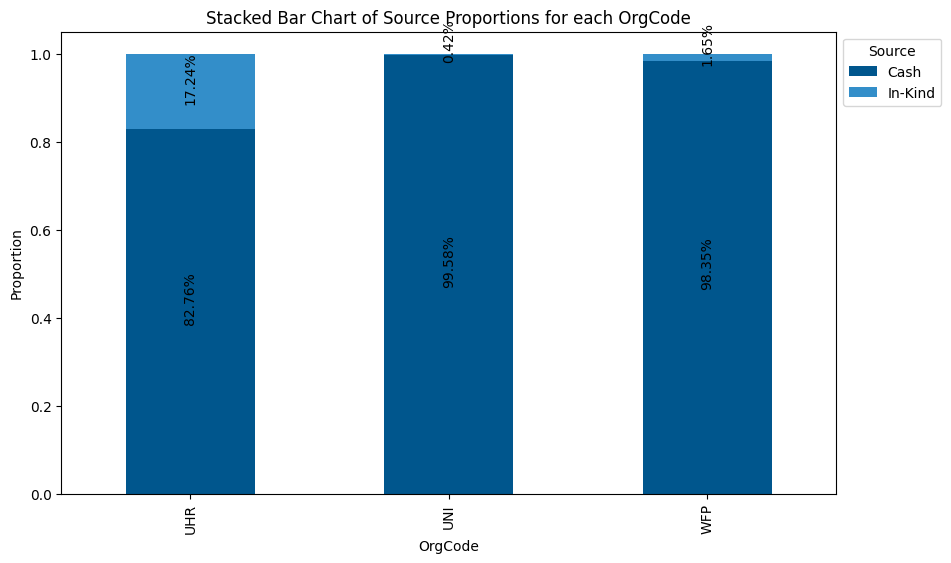

In [46]:
#we want to reproduce the same stacked bar plot for IGOs 
data_1 = private_public_income_IGOs.groupby(['OrgCode', 'Source']).size().unstack().fillna(0)
# Normalize the values by row (proportions)
data_normalized_1 = data_1.div(data_1.sum(axis=1), axis=0)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
data_normalized_1.plot(kind='bar', stacked=True,ax = ax,color = colors) 
colors = ['#00568D', '#338EC9'] 

# Annotate each bar with the corresponding values 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center',
                rotation='vertical', xytext=(0, 10), textcoords='offset points') 

plt.xlabel('OrgCode')
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart of Source Proportions for each OrgCode')
plt.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [47]:
private_public_income_NGOs['Source'].groupby(private_public_income_NGOs['OrgCode']).value_counts(normalize = True)

OrgCode  Source 
ACT      Cash       1.000000
AMI      Cash       0.888889
         In-Kind    0.111111
CAE      Cash       0.919753
         In-Kind    0.080247
GRP      Cash       1.000000
IRC      Cash       0.989007
         In-Kind    0.010993
MSF      Cash       0.962175
         In-Kind    0.037825
OSM      Cash       0.878788
         In-Kind    0.121212
OXM      Cash       1.000000
PLI      Cash       0.914209
         In-Kind    0.085791
RCS      Cash       0.908956
         In-Kind    0.091044
SOS      Cash       0.887601
         In-Kind    0.112399
STC      Cash       0.948156
         In-Kind    0.051844
WVI      Cash       0.844023
         In-Kind    0.155977
WWF      Cash       1.000000
Name: proportion, dtype: float64

In [49]:
# Apply the similarity calculation function to each row and store the results in a new column
private_public_income['Similarity'] = private_public_income.apply(calculate_similarity, axis=1) 

In [50]:
#filter out the values of notes with a similarity higher than 0.3 
private_public_income.loc[private_public_income['Similarity'] > 0.3,'Notes'] = ''

In [51]:
#replace the available/unavailable words
private_public_income['Notes'] = private_public_income['Notes'].str.replace('avilable', 'available')

In [52]:
#plot out the word cloud for the notes column 
# Combine the text from all rows into a single string
text = ' '.join(private_public_income[private_public_income['Notes'].notna()]['Notes'])

In [69]:
reversed_cmap = custom_palette.reversed()

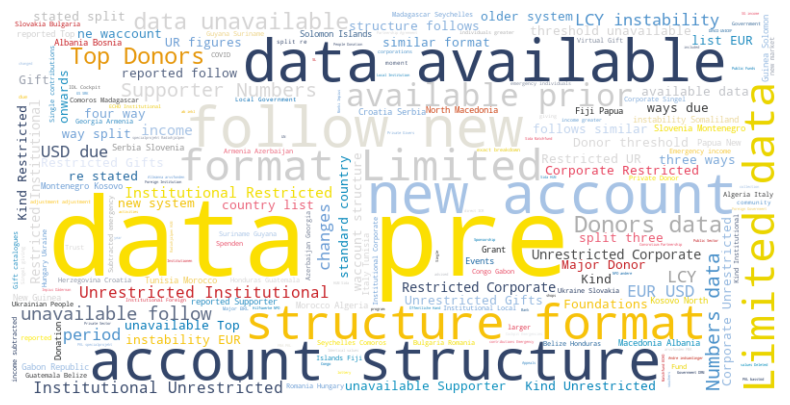

In [70]:
# Generate a word cloud 
wordcloud = WordCloud(width=800, height=400,background_color='white',colormap = reversed_cmap).generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

In [54]:
private_public_income['CountryStandardised'].value_counts()

CountryStandardised
USA                               2760
United Kingdom                    1406
Germany                            881
Canada                             764
France                             724
                                  ... 
French Southern Territories          2
Pitcairn                             2
Montserrat                           2
Niue                                 1
British Indian Ocean Territory       1
Name: count, Length: 248, dtype: int64

In [55]:
#assign NA values for the new columns as iniatilization. 
private_public_income['PSPMarketType'] = np.nan 
private_public_income['PSPMarketSubType'] = np.nan 
private_public_income.head()

,ETLControlID,OrgCode,RowIndex,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,...,IncomeLCU2022,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Group,Organization Class,Similarity,PSPMarketType,PSPMarketSubType
0,BFB0E994-256E-4E8B-B8C1-179DDCC25F91,ACT,9,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,...,805000.0,NAP,1.0,0,APAC,Private Sector,Non-Governmental Organizations (NGOs),0.125000,NaN,NaN
1,BFB0E994-256E-4E8B-B8C1-179DDCC25F91,ACT,107,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,...,0.0,NaN,NaN,0,AFR,Private Sector,Non-Governmental Organizations (NGOs),0.160000,NaN,NaN
2,BFB0E994-256E-4E8B-B8C1-179DDCC25F91,ACT,147,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,...,0.0,NaN,NaN,0,AFR,Private Sector,Non-Governmental Organizations (NGOs),0.160000,NaN,NaN
3,BFB0E994-256E-4E8B-B8C1-179DDCC25F91,ACT,157,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,...,1076000.0,NAP,1.0,0,EUR,Private Sector,Non-Governmental Organizations (NGOs),0.121212,NaN,NaN
4,BFB0E994-256E-4E8B-B8C1-179DDCC25F91,ACT,161,Spain,Alianza (Spain),Europe,Institutional,Country - raising income,Unspecified,Unspecified,...,11893000.0,NAP,1.0,0,EUR,Public Funds,Non-Governmental Organizations (NGOs),0.160000,NaN,NaN


In [56]:
private_public_income[private_public_income['UNHCR market'] == 1]['CountryStandardised'].value_counts() 

CountryStandardised
USA                     2760
United Kingdom          1406
Germany                  881
Canada                   764
France                   724
Australia                673
Netherlands              657
Switzerland              598
Spain                    591
Sweden                   589
Italy                    584
Japan                    507
Denmark                  478
Hong Kong                455
Belgium                  389
Mexico                   278
Brazil                   275
Thailand                 273
United Arab Emirates     268
Indonesia                260
Philippines              244
South Africa             222
China                    215
Malaysia                 197
Saudi Arabia             164
Greece                   156
Argentina                154
Kenya                    131
Qatar                    121
Nigeria                  118
Kuwait                   108
Name: count, dtype: int64

In [57]:
#function to fill in the columns 

'''
it is okay to note the markets even for other organizations. 

'''

def new_function(country,col_value1,col_value2): 
    private_public_income.loc[private_public_income['CountryStandardised'] == country,'PSPMarketType'] = col_value1 
    private_public_income.loc[private_public_income['CountryStandardised'] == country,'PSPMarketSubType'] = col_value2  
    

In [58]:
#assign countries to their respective classes 
new_function('Mauritius','Pre-Entry','Exploring')
new_function('Ghana','PSP Emerging Markets','Test') 
new_function('Kenya','PSP Emerging Markets','Start Up')
new_function('Nigeria','PSP Emerging Markets','Start Up')
new_function('South Africa','PSP Emerging Markets','Start Up') 
new_function('Chile','Pre-Entry','Exploring') 
new_function('Columbia','Pre-Entry' ,'Exploring')
new_function('Ecuador' , 'Pre-Entry','Exploring')
new_function('Peru','Pre-Entry' ,'Exploring')
new_function('Uruguay' ,'Pre-Entry' ,'Exploring')
new_function('Argentina' ,'PSP Emerging Markets','Start Up' )
new_function('Mexico','PSP Emerging Markets','Start Up' )
new_function('Brazil' ,'PSP Emerging Markets','Developing')
new_function('India' ,'Pre-Entry' ,'Exploring')
new_function('New Zealand' ,'PSP Emerging Markets','Test') 
new_function('China' ,'PSP Emerging Markets','Start Up ') 
new_function('Indonesia' ,'PSP Emerging Markets','Start Up' ) 
new_function('Singapore' ,'PSP Emerging Markets','Start Up' ) 
new_function('Malaysia' ,'PSP Emerging Markets','Developing') 
new_function('Philippines' ,'PSP Emerging Markets','Developing') 
new_function('Thailand' ,'PSP Core Markets' ,'10m') 
new_function('Australia' ,'PSP Core Markets' ,'25m') 
new_function('Hong Kong' ,'PSP Core Markets' ,'25m') 
new_function('Japan' ,'PSP Core Markets' ,'100m') 
new_function('Korea','PSP Core Markets' ,'100m')
new_function('Austria','Pre-Entry' ,'Exploring') 
new_function('Finland' ,'Pre-Entry' ,'Exploring')
new_function('Norway','Pre-Entry' ,'Exploring')
new_function('Portugal' ,'PSP Emerging Markets','Test')
new_function('Belgium' ,'PSP Emerging Markets','Start Up' )
new_function('Greece','PSP Emerging Markets','Start Up' )
new_function('Denmark','PSP Core Markets' ,'10m')
new_function('France','PSP Core Markets' ,'25m')
new_function('Netherlands','PSP Core Markets' ,'25m')
new_function('Switzerland','PSP Core Markets' ,'25m') 
new_function('UK','PSP Core Markets' ,'25m')
new_function('Italy' ,'PSP Core Markets' ,'50m') 
new_function('Sweden','PSP Core Markets' ,'50m') 
new_function('Germany' ,'PSP Core Markets' ,'100m' ) 
new_function('Spain','PSP Core Markets' ,'100m' ) 
new_function('Oman' ,'Pre-Entry' ,'Exploring') 
new_function('Egypt','PSP Emerging Markets','Test')
new_function('Morocco','PSP Emerging Markets','Test')
new_function('Turkey','PSP Emerging Markets','Test')
new_function('Kuwait','PSP Core Markets' ,'10m')
new_function('Saudi Arabia' ,'PSP Core Markets' ,'25m') 
new_function('Qatar','PSP Core Markets' ,'25m') 
new_function('United Arab Emirates' ,'PSP Core Markets' ,'50m') 
new_function('Canada','PSP Core Markets' ,'25m') 
new_function('USA','PSP Core Markets' ,'100m') 


In [59]:
private_income = private_public_income[private_public_income['Group'] == 'Private Sector']

In [60]:
# create acolumn indicating income type [one off giving or committed] 

mask_regular_giving = (private_public_income['Group'] == 'Private Sector') & (private_public_income['Type'] == 'Regular Giving')

private_public_income['Income Type'] = private_public_income.loc[mask_regular_giving ,'Income Type'] = 'Committed Giving'

mask_one_off_giving = (private_public_income['Group'] == 'Private Sector') & (private_public_income['Type'] != 'Regular Giving')

private_public_income['Income Type'] = private_public_income.loc[mask_one_off_giving ,'Income Type'] = 'One-off Giving'

# Assign np.nan for rows where neither condition is true
private_public_income.loc[~(mask_regular_giving | mask_one_off_giving), 'Income Type'] = np.nan


In [61]:
#dataframe containing only private income data 

private_income = private_public_income[private_public_income['Group'] == 'Private Sector']


In [71]:
#save the resulting dataset to the variable 
%store private_income

Stored 'private_income' (DataFrame)


In [72]:
private_income.columns

Index(['ETLControlID', 'OrgCode', 'RowIndex', 'CountryStandardised',
       'CountrySubmitted', 'RegionSubmitted', 'LineDescription',
       'IncomeAllocation', 'RestrictedIncome', 'EmergencyIncome', 'Source',
       'Category', 'Type', 'Item', 'CurrencyCode', 'Notes',
       'IncomeSubmitted2010', 'IncomeSubmitted2011', 'IncomeSubmitted2012',
       'IncomeSubmitted2013', 'IncomeSubmitted2014', 'IncomeSubmitted2015',
       'IncomeSubmitted2016', 'IncomeSubmitted2017', 'IncomeSubmitted2018',
       'IncomeSubmitted2019', 'IncomeSubmitted2020', 'IncomeSubmitted2021',
       'IncomeSubmitted2022', 'ProvisionalFigureCY', 'CurrencyName',
       'ExcludeRow', 'IncomeUSD2010', 'IncomeUSD2011', 'IncomeUSD2012',
       'IncomeUSD2013', 'IncomeUSD2014', 'IncomeUSD2015', 'IncomeUSD2016',
       'IncomeUSD2017', 'IncomeUSD2018', 'IncomeUSD2019', 'IncomeUSD2020',
       'IncomeUSD2021', 'IncomeUSD2022', 'IncomeEUR2010', 'IncomeEUR2011',
       'IncomeEUR2012', 'IncomeEUR2013', 'IncomeEUR2014', 'I

In [1]:
import nltk

In [2]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\nourd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


True

In [3]:
import nltk
#find collocations in the column 
from nltk.corpus import webtext
 
# use to find bigrams, which are pairs of words
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from nltk.text import Text

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nourd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nourd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
#convert the currrent textual column into a text file 
text = ' '.join(private_public_income[private_public_income['Notes'].notna()]['Notes'])
#write the reulting text into txt file 
file_path = 'C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\notes_text.txt' 
with open(file_path, 'w') as file:
    file.write(text)   

In [ ]:
#remove unnessary characters 
#open file 
with open(file_path, "r") as file:
    content = file.read() 
#remove unnessary - and . etc.. 

content = content.replace(",", "")
content = content.replace("-", "")
content = content.replace(".", "") 
content = content.replace('"', "")
content = content.replace("/", "")
content = content.replace("&", "") 

#remove stop words 

# Tokenize the sentence into words
words = word_tokenize(content)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokenized words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words to form a new sentence without stop words
filtered_content = ' '.join(filtered_words)

#write the new modifications into the file 
with open(file_path, "w") as file:
    file.write(filtered_content)

In [ ]:
# Loading the data
words = [w.lower() for w in webtext.words('C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\notes_text.txt')] 

biagram_collocation = BigramCollocationFinder.from_words(words)
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 50)


# In[96]:


# Get the bigrams
bigrams = biagram_collocation.ngram_fd.items()

# Count the number of bigram pairs
num_bigram_pairs = len(bigrams)

# Print the number of bigram pairs
print(f"Number of bigram pairs: {num_bigram_pairs}")


# In[97]:


#since we can see that the words can come in form of three
#we can perform the same analysis but now with trigrams 

#open file 
with open(file_path, "r") as file:
    content = file.read()  

    
# Tokenize the string into words
words = nltk.word_tokenize(content)   

# Create an NLTK Text object 
text_object = Text(words) 

# Create trigrams
trigrams = list(ngrams(text_object, 3))

# Calculate frequency distribution of trigrams
trigram_freq = nltk.FreqDist(trigrams) 

# Print the most common trigrams
print(trigram_freq.most_common(50))


In [ ]:
import nltk


# In[88]:


nltk.download('webtext')


# In[89]:


#find collocations in the column 
from nltk.corpus import webtext
 
# use to find bigrams, which are pairs of words
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures 


# In[90]:


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from nltk.text import Text


# In[91]:


nltk.download('punkt')


# In[92]:


nltk.download('stopwords')


# In[93]:


#convert the currrent textual column into a text file 
text = ' '.join(private_public_income[private_public_income['Notes'].notna()]['Notes'])
#write the reulting text into txt file 
file_path = 'C:\\Users\\TUNISIE\\Downloads\\notes_text.txt' 
with open(file_path, 'w') as file:
    file.write(text)


# In[94]:


#remove unnessary characters 
#open file 
with open(file_path, "r") as file:
    content = file.read() 
#remove unnessary - and . etc.. 

content = content.replace(",", "")
content = content.replace("-", "")
content = content.replace(".", "") 
content = content.replace('"', "")
content = content.replace("/", "")
content = content.replace("&", "") 

#remove stop words 

# Tokenize the sentence into words
words = word_tokenize(content)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokenized words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words to form a new sentence without stop words
filtered_content = ' '.join(filtered_words)

#write the new modifications into the file 
with open(file_path, "w") as file:
    file.write(filtered_content)


# In[95]:


# Loading the data
words = [w.lower() for w in webtext.words(
	'C:\\Users\\TUNISIE\\Downloads\\notes_text.txt')] 

biagram_collocation = BigramCollocationFinder.from_words(words)
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 50)


# In[96]:


# Get the bigrams
bigrams = biagram_collocation.ngram_fd.items()

# Count the number of bigram pairs
num_bigram_pairs = len(bigrams)

# Print the number of bigram pairs
print(f"Number of bigram pairs: {num_bigram_pairs}")


# In[97]:


#since we can see that the words can come in form of three
#we can perform the same analysis but now with trigrams 

#open file 
with open(file_path, "r") as file:
    content = file.read()  

    
# Tokenize the string into words
words = nltk.word_tokenize(content)   

# Create an NLTK Text object 
text_object = Text(words) 

# Create trigrams
trigrams = list(ngrams(text_object, 3))

# Calculate frequency distribution of trigrams
trigram_freq = nltk.FreqDist(trigrams) 

# Print the most common trigrams
print(trigram_freq.most_common(50))



In [ ]:
#function to save a dataset in a pickle format 


def save_dataset_to_pickle(dataset, filename):
    """
    Save a dataset to a pickle file.

    Parameters:
    - dataset: The dataset to be saved.
    - filename: The name of the pickle file (including the .pkl extension).
    """
    with open(filename, 'wb') as file:
        pickle.dump(private_public_income, file)
    print(f'Dataset saved to {filename}')


In [62]:
#save it to a pickle file 
save_dataset_to_pickle(private_income,"private_income.pkl")

NameError: name 'save_dataset_to_pickle' is not defined

In [ ]:
save_dataset_to_pickle(private_income,"private_income.pkl")

In [ ]:
save_dataset_to_pickle(private_public_income,"private_public_income.pkl")